## Dataset
- http://bit.ly/bream_list
- http://bit.ly/smelt_list

In [ ]:
# 도미의 길이, 무게 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어의 길이, 무게 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 산점도

<function matplotlib.pyplot.show(close=None, block=None)>

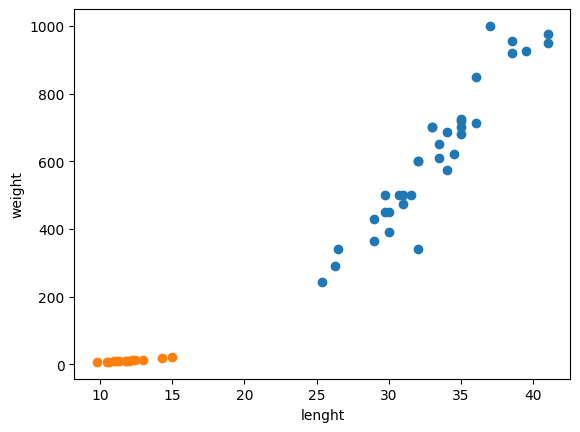

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show

## k-Nearest Neighbors (k-최근접 이웃)

In [3]:
# 도미와 빙어를 하나의 데이터로 합병
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 사이킷런(scikit-learn)은 각 특성의 리스트를 세로방향으로 늘어뜨린 2차원 리스트로 만들어야 함
fish_data = [[l, w] for l, w in zip(length, weight)]

In [7]:
print(len(bream_length)) # 도미 수
print(len(smelt_length)) # 빙어 수

35
14


In [8]:
# 정답데이터 생성
# 도미는 1, 빙어는 0으로 표기

fish_target = [1] * 35 + [0] * 14

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스의 객체 생성
kn = KNeighborsClassifier()

In [12]:
# 학습
kn.fit(fish_data, fish_target)

# 평가
kn.score(fish_data, fish_target)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

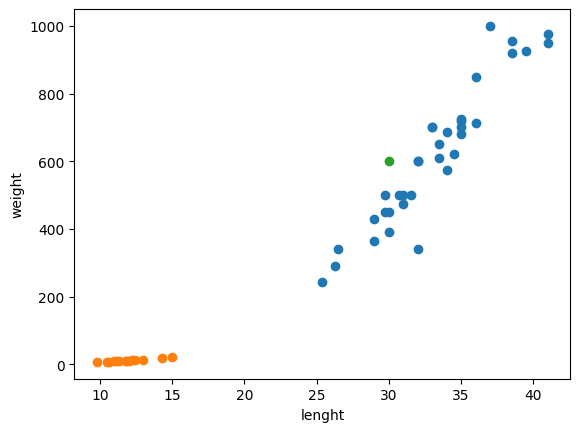

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show

In [14]:
# 학습 데이터 중 가장 가까운 5개 데이터 중 다수를 차지하는 값으로 예측
kn.predict([[30, 600]])

array([1])

## KNeighborsClassifier의 매개변수 `n_neighbors`

- default 값은 5

In [ ]:
# 학습 데이터 중 가장 가까운 49개 데이터 중 다수를 차지하는 값으로 예측
# 학습 데이터가 49개 이므로 어떤 값이 들어와도 다수를 차지하는 도미(35개)로 예측
kn49 = KNeighborsClassifier(n_neighbors=49)

In [18]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [19]:
print(35/49)

0.7142857142857143


In [21]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  # k-최근접 이웃 개수 설정
  kn.n_neighbors = n
  
  # 평가
  score = kn.score(fish_data, fish_target)

  # 100% 정확도에 미치지 못하는 이웃개수 출력
  if score < 1:
    print(n, score)

18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143
